<a href="https://colab.research.google.com/github/breranansi/IDC6940_RSH26/blob/main/Progress_Report_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDC6940
## Weekly Report 3
### Richard Henry & Delanyce Rose

June 26, 2025

We will continue with two symbolic regression libraries available for Python.

## PySR
Since this library runs in Google Colab, but continually dies on a local machine running Jupyter notebook, the first step is to ensure that the library is installed on the current instance of Colab.


In [16]:
# Install libraries
!pip install -U pysr

Next we force the installation of the julia programming language by making a call to the Python side:

In [17]:
# import pysr

Now we will import everything else we need:

In [18]:
# Call libraries
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import time

Next, we rebuild our toy dataset and plot it.

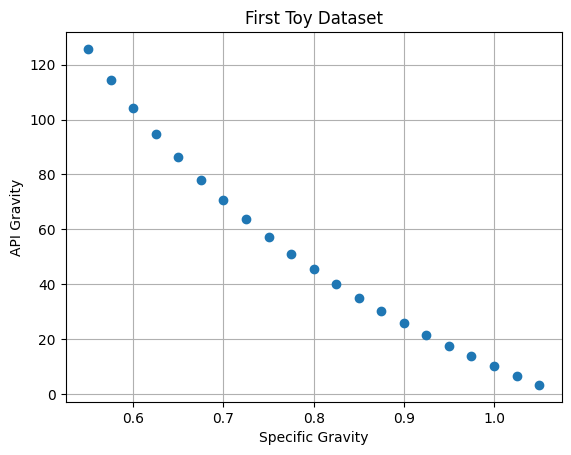

In [19]:
# Build Two Copies of Toy Dataset
x4=np.arange(start=0.55,stop=1.075,step=0.025)
x5=np.arange(start=0.55,stop=1.075,step=0.025)
y4=141.5/x4-131.5
y5=141.5/x5-131.5
# Plot
plt.plot(x4,y4,marker="o",linestyle="None")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("First Toy Dataset")
plt.grid()
plt.show()

Next, we:
- Initiate the Symbolic Regressor
- Use the regressor to fit the toy dataset
- Predict the API gravity values using the Regressor.

The creators of this library chose to use the scikit-learn workflow, so that the terminology is similar to what was used in progress report 1, with the exception of having to reshape the data because we only have one predictor.

We are using defaults for everything except for the random number seed.

In [20]:
t0 = time.time()
myMod04=PySRRegressor(random_state=7)
myMod04.fit(x4.reshape(-1, 1),y4)
y_pred04=myMod04.predict(x4.reshape(-1, 1))
print("time to fit: ",time.time() - t0, 'seconds')

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pysr/sr.py:1873: UserWarning: Note: Setting `random_state` without also setting `deterministic=True` and `parallelism='serial'` will result in non-deterministic searches.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 3.660e+04
Progress: 185 / 3100 total iterations (5.968%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.321e+03  0.000e+00  y = 52.149
3           6.519e+02  3.532e-01  y = 44 / x₀
5           4.859e-11  1.511e+01  y = (141.5 / x₀) + -131.5
7           4.305e-11  6.057e-02  y = ((141.5 / x₀) + -60.092) - 71.408
9           3.196e-11  1.489e-01  y = ((x₀ + 141.5) / x₀) + (-61.905 - 70.595)
21          2.496e-11  2.061e-02  y = ((((186.51 / (x₀ + x₀)) + ((96.494 / (x₀ + x₀)) + -8.3...
                                      28)) + -115.6) + (x₀ - 7.5748)) - x₀
───────────────────────────────────────────────────────────────────────────────────────────────────
═══════════════════════════════════════════════════════════════════════════════════════════

[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 7.140e+04
Progress: 2731 / 3100 total iterations (88.097%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.321e+03  0.000e+00  y = 52.149
3           6.519e+02  3.532e-01  y = 44 / x₀
5           4.859e-11  1.511e+01  y = (141.5 / x₀) + -131.5
7           3.196e-11  2.095e-01  y = ((x₀ + 141.5) / x₀) + -132.5
9           1.880e-11  2.654e-01  y = ((42.384 / x₀) + -131.5) + (99.116 / x₀)
13          1.464e-11  6.250e-02  y = (87.241 / (x₀ + x₀)) + (-131.5 + (195.76 / (x₀ + x₀)))
15          8.402e-12  2.776e-01  y = (122.15 / (x₀ + x₀)) + (((x₀ - -160.85) / (x₀ + x₀)) +...
                                       -132)
17          6.215e-12  1.508e-01  y = ((122.15 / (x₀ + x₀)) + (((x₀ - -160.85) / (x₀ + x₀)) ...
                                   

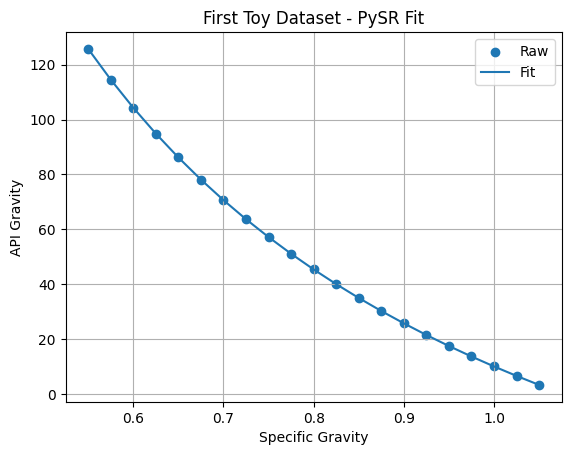

In [21]:
plt.scatter(x4,y4,label="Raw")
plt.plot(x4,y_pred04,label="Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("First Toy Dataset - PySR Fit")
plt.grid()
plt.legend()
plt.show()

We appear to have a wonderful fit, so let us look at the winning equation:

In [22]:
myEq04=myMod04.sympy()
myEq04

(x0 - 1*(-160.84647))/(x0 + x0) - 132.00002 + 122.15356/(x0 + x0)

On first glance, this equation looks too complicated.  However, since it is in `sympy` format, we can ask for a simplified version:

In [23]:
sym.simplify(myEq04)

-131.50002 + 141.500015/x0

This is very close to our target equation.  The big difference between `PySR` and `gramEvol` is that the constants calculated from regression instead of being picked from a list.

Just to be clear, here is the `sympy` version of the target equation:

In [24]:
x, y = sym.symbols('x y')
myTarg=sym.sympify(141.5/x-131.5)
myTarg

-131.5 + 141.5/x

## GPLearn
Next, we are going to repeat the workflow with a similar python library.

In [25]:
# Install libraries
!pip install gplearn

In [26]:
# Call libraries
#import numpy as np
#import pandas as pd
#import sympy as sym
#import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
#import time

This library also follows scikit-learn:

In [27]:
t1 = time.time()
myMod05=SymbolicRegressor(verbose=1)
myMod05.fit(x5.reshape(-1, 1),y5)
y_pred05=myMod05.predict(x5.reshape(-1, 1))
print("time to fit: ",time.time() - t1, 'seconds')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.77          230.199      127          16.0636              N/A      1.19m
   1    69.97           61.557       39          9.73818              N/A     53.49s
   2   105.94          109.546       75          6.65517              N/A     59.87s
   3   111.77           594.88      135           5.8833              N/A      1.22m
   4   101.34           430.16      111          4.87836              N/A      1.09m
   5   118.17          829.213      123          4.32692              N/A     26.02s
   6   123.19          636.761      111          3.81706              N/A     20.34s
   7   117.01          919.962      125          3.68446              N/A     18.69s
   8   114.20          1030.04      139          2.86918              N/A  

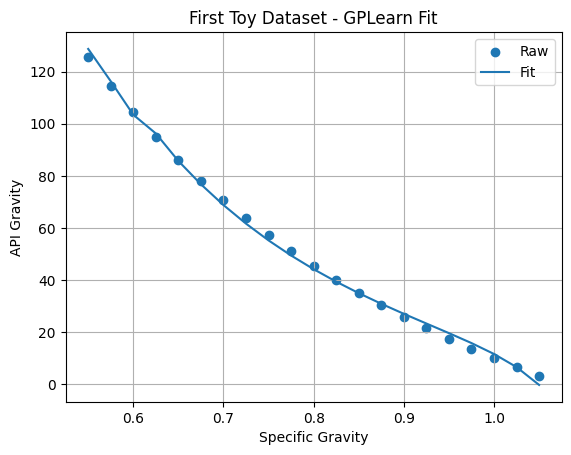

In [28]:
plt.scatter(x5,y5,label="Raw")
plt.plot(x5,y_pred05,label="Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("First Toy Dataset - GPLearn Fit")
plt.grid()
plt.legend()
plt.show()

The fit is *almost* as good as PySR, and it ran *almost* twice as fast.

Since we chose *nearly* default parameters for this library we need to provide a dictionary for it to convert the winning equation to sympy:

In [29]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
myEq05 = sym.sympify(str(myMod05._program), locals=converter)
myEq05

2.86285714285714*(X0 - 0.357)*(-(2.710027100271*X0 + 0.059/X0)*(-0.8 + (3.16000385319333*X0*(X0 - 0.26) + 4.13139611542167*X0 + 3.61861904761905)/(X0 - 0.357 - 0.872428571428571/X0) + 1.43142857142857/X0) + (-2.80898876404494*X0*(-X0 - 0.306) + 0.501)/((3.19488817891374*X0 + 1)/(1.489*X0 - (2.710027100271*X0 + 0.059/X0)*(0.356 + (3.16000385319333*X0*(X0 - 0.26) + 4.13139611542167*X0 + 3.61861904761905)/(X0 - 0.357 - 0.872428571428571/X0) + 0.791139240506329*(3.19488817891374*X0 + 1)/X0) + 0.643 - 0.872428571428571/X0) - 1) - 231.122687272957/X0**2)/((1.84152184795823 - 16.8788528927984*X0)*(X0**2 + 0.26*X0))

Hmm. Lets have it simplified:

In [30]:
sym.simplify(myEq05)

(278.820002953071*X0**13 + 640.018813576176*X0**12 + 690.754307137746*X0**11 + 268.31036133222*X0**10 + 5457.87712812355*X0**9 + 7619.62577640509*X0**8 - 6937.47921256253*X0**7 - 16804.077869542*X0**6 + 1575.78354402274*X0**5 + 6273.6100798772*X0**4 - 102.256793911761*X0**3 + 2.9432049685599*X0**2 - 170.865461382981*X0 - 8.39525390570684)/(X0**3*(144.545366338012*X0**10 + 282.301566657126*X0**9 - 48.7993700979364*X0**8 - 481.522001438071*X0**7 - 191.930188319542*X0**6 + 109.695704741436*X0**5 + 59.6272490047645*X0**4 + 16.4463177493779*X0**3 + 1.59776694954208*X0**2 - 0.303370477591*X0 - 0.0170104154782206))

That did not change much. (:-<)  This is a *good* equation, but it is much more complicated than it needs to be.

## Tentative Conclusions
1. Setting the random number seed does *not* guarantee the same answers in either library.
2. Both libraries "work", but one may need more tuning than the other to produce actionable results.
3. It would appear as though domain knowledge may be necessary to tell whether a winning equation is "simple" enough.